In [4]:
%matplotlib inline
import matplotlib.pylab
import numpy as np
import pandas as pd

import pandas_datareader as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader('F','yahoo',start, end)

In [5]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,7.906168,60855800
2010-01-05,10.45,11.24,10.40,10.96,8.429146,215620200
2010-01-06,11.21,11.46,11.13,11.37,8.744469,200070600
2010-01-07,11.46,11.69,11.32,11.66,8.967500,130201700
2010-01-08,11.67,11.74,11.46,11.69,8.990576,130463000


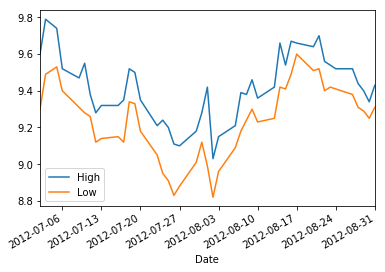

In [9]:
f['2012-07':'2012-08'][['High','Low']].plot()

**Is the variance of the trading volume relatively stable over time?**

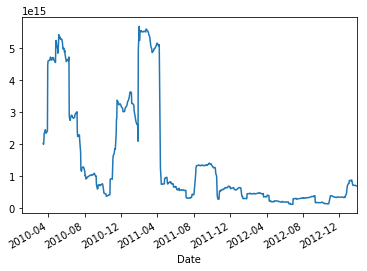

In [10]:
r = f.rolling(50).var()['Volume'].plot()

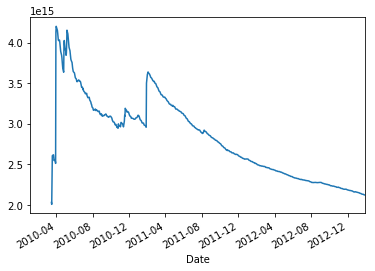

In [11]:
r = f.expanding(50).var()['Volume'].plot()

**On how many days did the stock close higher than it opened?**

In [12]:
len(f[f.Close > f.Open])

353

**And did the 'Up' days become more or less frequent over time?**

In [13]:
f['DayGain'] = f.Close - f.Open

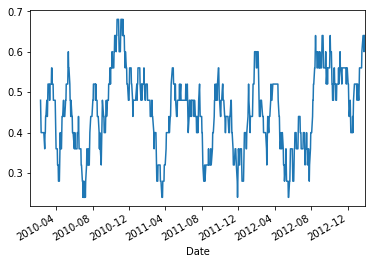

In [14]:
f.rolling(window=25)['DayGain'].apply(lambda x: len([xi for xi in x if xi>0])/len(x)).plot()

**Compute and the plot the mean monthly High value of the stock**

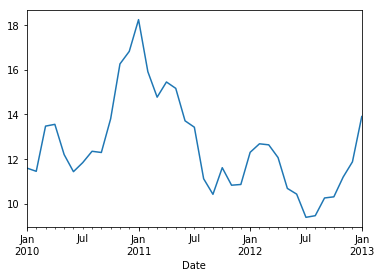

In [15]:
f.resample('M').mean()['High'].plot()

**Explore the variance of the differenced volume**

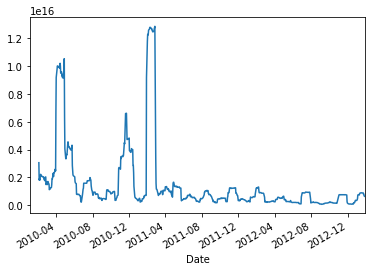

In [16]:
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window=20).var().plot()

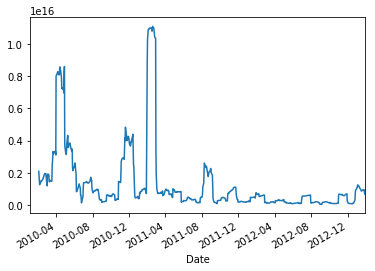

In [18]:
#use diff instead of shift
volume = f.Volume
volume_lagged = f.Volume.diff()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window=20).var().plot()

**Does the lagged time series correlate with itself?**

In [20]:
#what is the best predictor of tomorrow's stock price?
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656506
real,0.656506,1.000000
